In [111]:
# Import de las librerías
import tweepy
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import json
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [112]:
# Credenciales de la API de Twitter
consumerKey = 'gjKoF1kHH7cdT6XvTQ7GN2VYL'
consumerSecret = 'T61iAsO1NotMI3G8RSgzXRu8zM1rGPorbcszGiRafgq9FBjwr4'
accessToken = '1220387467-iHOY1FbL9tK98rCDMfhmkrjnNOv9g2zn29xG52X'
accessTokenSecret = 'ec7c32TT2pojwQySwNIKfbTJi5sxoUXs0XiElEqMGzDl4'

In [113]:
# Objeto de autentificación
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret) 
    
# Acceder al token
authenticate.set_access_token(accessToken, accessTokenSecret) 
    
# con este objeto realizaremos todas las llamadas al API
api = tweepy.API(authenticate, wait_on_rate_limit = True, wait_on_rate_limit_notify=True)

In [114]:
#Obtener informacion de Bill Gates
data = api.get_user("BillGates")
data

User(_api=<tweepy.api.API object at 0x0000021B9AF8C370>, _json={'id': 50393960, 'id_str': '50393960', 'name': 'Bill Gates', 'screen_name': 'BillGates', 'location': 'Seattle, WA', 'profile_location': {'id': '300bcc6e23a88361', 'url': 'https://api.twitter.com/1.1/geo/id/300bcc6e23a88361.json', 'place_type': 'unknown', 'name': 'Seattle, WA', 'full_name': 'Seattle, WA', 'country_code': '', 'country': '', 'contained_within': [], 'bounding_box': None, 'attributes': {}}, 'description': "Sharing things I'm learning through my foundation work and other interests.", 'url': 'https://t.co/emd1hfqSRD', 'entities': {'url': {'urls': [{'url': 'https://t.co/emd1hfqSRD', 'expanded_url': 'https://gatesnot.es/blog', 'display_url': 'gatesnot.es/blog', 'indices': [0, 23]}]}, 'description': {'urls': []}}, 'protected': False, 'followers_count': 52847247, 'friends_count': 256, 'listed_count': 4, 'created_at': 'Wed Jun 24 18:44:10 +0000 2009', 'favourites_count': 143, 'utc_offset': None, 'time_zone': None, 'geo

In [115]:
#Obtener informacion de Bill Gates
data = api.get_user("BillGates")
print (json.dumps(data._json, indent=4))

{
    "id": 50393960,
    "id_str": "50393960",
    "name": "Bill Gates",
    "screen_name": "BillGates",
    "location": "Seattle, WA",
    "profile_location": {
        "id": "300bcc6e23a88361",
        "url": "https://api.twitter.com/1.1/geo/id/300bcc6e23a88361.json",
        "place_type": "unknown",
        "name": "Seattle, WA",
        "full_name": "Seattle, WA",
        "country_code": "",
        "country": "",
        "contained_within": [],
        "bounding_box": null,
        "attributes": {}
    },
    "description": "Sharing things I'm learning through my foundation work and other interests.",
    "url": "https://t.co/emd1hfqSRD",
    "entities": {
        "url": {
            "urls": [
                {
                    "url": "https://t.co/emd1hfqSRD",
                    "expanded_url": "https://gatesnot.es/blog",
                    "display_url": "gatesnot.es/blog",
                    "indices": [
                        0,
                        23
            

In [116]:
# Se extraen un par de tweets a modo de prueba
posts = api.user_timeline(screen_name="BillGates", lang ="en", tweet_mode="extended")

#  Se hace un print de los 1eros 5 tweets
print("Show the 5 recent tweets:\n")
i=1
for tweet in posts[:5]:
    print(str(i) +') '+ tweet.full_text + '\n')
    i= i+1

Show the 5 recent tweets:

1) Bill Foege and Viktor Zdanov are phenomenal examples of what it means to harness science for global health. A well-deserved honor. https://t.co/44jYPCZCbt

2) Here are five books that I’d recommend as we wrap up 2020. I hope you find something that helps you—or the book lover in your life—finish the year on a good note. https://t.co/9N0hL2xvTQ

3) Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast, Rashida and I take on perhaps our biggest question yet with Pulitzer Prize-winning author @ElizKolbert. https://t.co/ugS31mpJin

4) This new quiz from @Gapminder is a clever way to fight misconceptions and “upgrade your worldview” about the incredible progress the world has made toward the Sustainable Development Goals to end poverty, fight inequality, and stop climate change: https://t.co/Qo0oaxv1tb

5) Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role socia

In [117]:
 # Se crea un DataFrame con la columna 'Tweets'
df = pd.DataFrame([tweet.full_text for tweet in posts], columns=['Tweets'])
# Show the first 5 rows of data
df.head()

,Tweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...
1,Here are five books that I’d recommend as we w...
2,Are we actually making progress on climate cha...
3,This new quiz from @Gapminder is a clever way ...
4,Rashida Jones and I talked to Yuval Noah Harar...


In [118]:
class TweetAnalyzer():
    """
    Clase creada para analizar los datos extraídos de Twitter
    """
    def tweets_to_data_frame(self, tweets):
        df = pd.DataFrame(data=[tweet.text for tweet in tweets], columns=['Tweets'])

        df['ID'] = np.array([tweet.id for tweet in tweets])
        df['Longitud'] = np.array([len(tweet.text) for tweet in tweets])
        df['Día'] = np.array([tweet.created_at for tweet in tweets])
        df['Fuente'] = np.array([tweet.source for tweet in tweets])
        df['Likes'] = np.array([tweet.favorite_count for tweet in tweets])
        df['Retweets'] = np.array([tweet.retweet_count for tweet in tweets])

        return df

In [119]:
tweet_analyzer = TweetAnalyzer()
tweets = api.user_timeline(screen_name="BillGates", count=200)
df = tweet_analyzer.tweets_to_data_frame(tweets)
df

,Tweets,ID,Longitud,Día,Fuente,Likes,Retweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...,1336751572043194370,140,2020-12-09 19:16:25,Twitter Web App,1518,102
1,Here are five books that I’d recommend as we w...,1336366810443042818,140,2020-12-08 17:47:30,Twitter Web App,5873,661
2,Are we actually making progress on climate cha...,1336027841289277441,140,2020-12-07 19:20:34,Twitter Web App,2177,178
3,This new quiz from @Gapminder is a clever way ...,1335246628609871873,140,2020-12-05 15:36:18,Twitter Web App,2757,421
4,Rashida Jones and I talked to Yuval Noah Harar...,1334908118162046976,140,2020-12-04 17:11:11,Twitter Web App,2146,265
...,...,...,...,...,...,...,...
195,If your New Year’s resolution is to be healthi...,1212794686630436864,117,2020-01-02 17:56:00,Sprinklr,13078,2029
196,I’m glad @beautiful__news is highlighting some...,1209169446868262912,116,2019-12-23 17:50:36,Sprinklr,5142,1043
197,RT @melindagates: Sir Fazle was a humanitarian...,1208500929248387072,140,2019-12-21 21:34:09,Twitter for Android,0,808
198,"Vaclav Smil is one of my favorite thinkers, an...",1208046545913962511,140,2019-12-20 15:28:35,Sprinklr,4515,618


In [120]:
# Promedio de la longitud de tweets:
print(np.mean(df['Longitud']))

# Máximo número de likes:
print(np.max(df['Likes']))

# Máximo número de RT:
print(np.max(df['Retweets']))

136.795
373725
96538


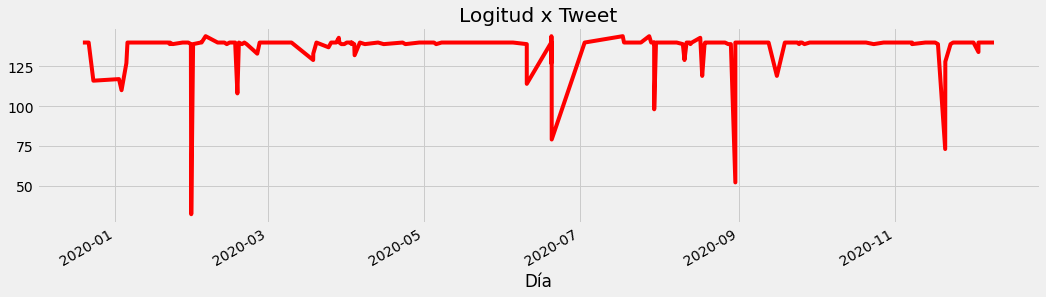

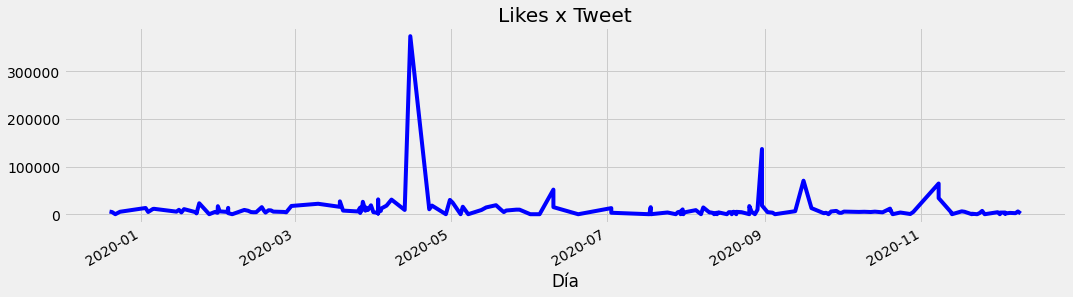

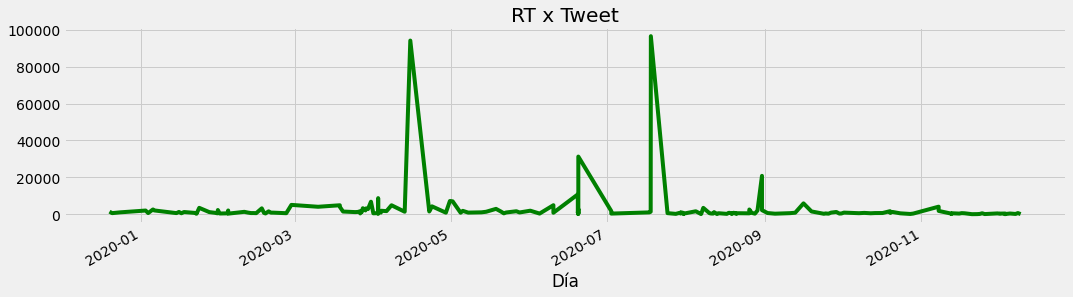

In [121]:
# Series de tiempo

time_likes = pd.Series(data=df['Longitud'].values, index=df['Día'])
time_likes.plot(figsize=(16, 4), color='r')
plt.title('Logitud x Tweet')
plt.show()
    
time_favs = pd.Series(data=df['Likes'].values, index=df['Día'])
time_favs.plot(figsize=(16, 4), color='b')
plt.title('Likes x Tweet')
plt.show()

time_retweets = pd.Series(data=df['Retweets'].values, index=df['Día'])
time_retweets.plot(figsize=(16, 4), color='g')
plt.title('RT x Tweet')
plt.show()

In [122]:
# Ahora, se crea una función con el fin de limpiar la data proveniente de los tweets, para su posterior análisis
def cleanTxt(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Se eliminan las mencions (@)
 text = re.sub('#', '', text) # Se eliminan los hashtags (#)
 text = re.sub('RT[\s]+', '', text) # Se eliminan los RT
 text = re.sub('https?:\/\/\S+', '', text) # Se eliminan los Hiperlinks
 
 return text


# Clean the tweets
df['Tweets'] = df['Tweets'].apply(cleanTxt)

# Show the cleaned tweets
df

,Tweets,ID,Longitud,Día,Fuente,Likes,Retweets
0,Bill Foege and Viktor Zdanov are phenomenal ex...,1336751572043194370,140,2020-12-09 19:16:25,Twitter Web App,1518,102
1,Here are five books that I’d recommend as we w...,1336366810443042818,140,2020-12-08 17:47:30,Twitter Web App,5873,661
2,Are we actually making progress on climate cha...,1336027841289277441,140,2020-12-07 19:20:34,Twitter Web App,2177,178
3,This new quiz from is a clever way to fight m...,1335246628609871873,140,2020-12-05 15:36:18,Twitter Web App,2757,421
4,Rashida Jones and I talked to Yuval Noah Harar...,1334908118162046976,140,2020-12-04 17:11:11,Twitter Web App,2146,265
...,...,...,...,...,...,...,...
195,If your New Year’s resolution is to be healthi...,1212794686630436864,117,2020-01-02 17:56:00,Sprinklr,13078,2029
196,I’m glad __news is highlighting some of the am...,1209169446868262912,116,2019-12-23 17:50:36,Sprinklr,5142,1043
197,: Sir Fazle was a humanitarian who helped us l...,1208500929248387072,140,2019-12-21 21:34:09,Twitter for Android,0,808
198,"Vaclav Smil is one of my favorite thinkers, an...",1208046545913962511,140,2019-12-20 15:28:35,Sprinklr,4515,618


In [123]:
# Se crea una función para medir subjetividad
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Se crea una función para medir polaridad
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Se crean nuevas columnas en base a las funciones creadas
df['Subjetividad'] = df['Tweets'].apply(getSubjectivity)
df['Polaridad'] = df['Tweets'].apply(getPolarity)

df

,Tweets,ID,Longitud,Día,Fuente,Likes,Retweets,Subjetividad,Polaridad
0,Bill Foege and Viktor Zdanov are phenomenal ex...,1336751572043194370,140,2020-12-09 19:16:25,Twitter Web App,1518,102,0.250000,0.250000
1,Here are five books that I’d recommend as we w...,1336366810443042818,140,2020-12-08 17:47:30,Twitter Web App,5873,661,0.000000,0.000000
2,Are we actually making progress on climate cha...,1336027841289277441,140,2020-12-07 19:20:34,Twitter Web App,2177,178,0.150000,0.100000
3,This new quiz from is a clever way to fight m...,1335246628609871873,140,2020-12-05 15:36:18,Twitter Web App,2757,421,0.643939,0.151515
4,Rashida Jones and I talked to Yuval Noah Harar...,1334908118162046976,140,2020-12-04 17:11:11,Twitter Web App,2146,265,0.066667,0.033333
...,...,...,...,...,...,...,...,...,...
195,If your New Year’s resolution is to be healthi...,1212794686630436864,117,2020-01-02 17:56:00,Sprinklr,13078,2029,0.527273,0.418182
196,I’m glad __news is highlighting some of the am...,1209169446868262912,116,2019-12-23 17:50:36,Sprinklr,5142,1043,0.950000,0.550000
197,: Sir Fazle was a humanitarian who helped us l...,1208500929248387072,140,2019-12-21 21:34:09,Twitter for Android,0,808,0.000000,0.000000
198,"Vaclav Smil is one of my favorite thinkers, an...",1208046545913962511,140,2019-12-20 15:28:35,Sprinklr,4515,618,0.727273,0.318182


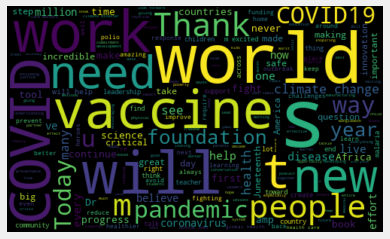

In [124]:
# Visualización en forma de "Nube de palabras"
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(allWords)


plt.imshow(wordCloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [125]:
# Se crea una función para asignar: Negativo, Positivo o Neutro, según corresponda
def getAnalysis(score):
    if score < 0:
        return 'Negativo'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positivo'
        
df['Análisis'] = df['Polaridad'].apply(getAnalysis)

df

,Tweets,ID,Longitud,Día,Fuente,Likes,Retweets,Subjetividad,Polaridad,Análisis
0,Bill Foege and Viktor Zdanov are phenomenal ex...,1336751572043194370,140,2020-12-09 19:16:25,Twitter Web App,1518,102,0.250000,0.250000,Positivo
1,Here are five books that I’d recommend as we w...,1336366810443042818,140,2020-12-08 17:47:30,Twitter Web App,5873,661,0.000000,0.000000,Neutral
2,Are we actually making progress on climate cha...,1336027841289277441,140,2020-12-07 19:20:34,Twitter Web App,2177,178,0.150000,0.100000,Positivo
3,This new quiz from is a clever way to fight m...,1335246628609871873,140,2020-12-05 15:36:18,Twitter Web App,2757,421,0.643939,0.151515,Positivo
4,Rashida Jones and I talked to Yuval Noah Harar...,1334908118162046976,140,2020-12-04 17:11:11,Twitter Web App,2146,265,0.066667,0.033333,Positivo
...,...,...,...,...,...,...,...,...,...,...
195,If your New Year’s resolution is to be healthi...,1212794686630436864,117,2020-01-02 17:56:00,Sprinklr,13078,2029,0.527273,0.418182,Positivo
196,I’m glad __news is highlighting some of the am...,1209169446868262912,116,2019-12-23 17:50:36,Sprinklr,5142,1043,0.950000,0.550000,Positivo
197,: Sir Fazle was a humanitarian who helped us l...,1208500929248387072,140,2019-12-21 21:34:09,Twitter for Android,0,808,0.000000,0.000000,Neutral
198,"Vaclav Smil is one of my favorite thinkers, an...",1208046545913962511,140,2019-12-20 15:28:35,Sprinklr,4515,618,0.727273,0.318182,Positivo


In [127]:
# Algunos Tweets 'Positivos'
print('Algunos de los Tweets reconocidos como positivos:\n')
j=1
sortedDF = df.sort_values(by=['Polaridad']) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Análisis'][i] == 'Positivo'):
    print(str(j) + ') '+ sortedDF['Tweets'][i])
    print()
    j= j+1

Algunos de los Tweets reconocidos como positivos:

1) Bill Foege and Viktor Zdanov are phenomenal examples of what it means to harness science for global health. A well-… 

2) Are we actually making progress on climate change? Can we really prevent a climate disaster? In this week’s podcast… 

3) This new quiz from  is a clever way to fight misconceptions and “upgrade your worldview” about the incred… 

4) Rashida Jones and I talked to Yuval Noah Harari about COVID conspiracy theories, the role social media plays in spr… 

5) I believe we can avoid a climate disaster—if we deploy the clean-energy tools we have now wisely, and if we make bi… 

6) To reduce duplication, focus the government’s efforts, and get the most innovation out of every dollar of funding,… 

7) This the most important thing the U.S. can do to lead the world in innovations that will solve climate change. 

8) I’m inspired by Quarraisha Abdool Karim and . They are two of the most respected HIV/AIDS researche… 

9) : M

In [128]:
# Algunos Tweets 'Negativos'
print('Algunos de los Tweets reconocidos como negativos:\n')
j=1
sortedDF = df.sort_values(by=['Polaridad'],ascending=False) #Sort the tweets
for i in range(0, sortedDF.shape[0] ):
  if( sortedDF['Análisis'][i] == 'Negativo'):
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j=j+1

Algunos de los Tweets reconocidos como negativos:

1) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion o… 

2) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at… 

3) 30: Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotten right…

4) : What do COVID-19 and malaria have to do with each other?  

When COVID-19 struck, it disrupted the entire global healt…

5) To prevent the worst effects of climate change, we need innovation across all sectors—especially in the hardest to… 

6) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise m… 

7) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

8) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and o

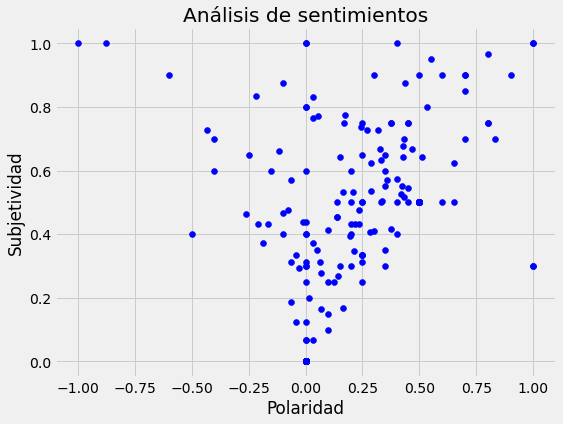

In [129]:
# Se plotea para entender mejor el resultado
plt.figure(figsize=(8,6)) 
for i in range(0, df.shape[0]):
  plt.scatter(df["Polaridad"][i], df["Subjetividad"][i], color='Blue') 
# plt.scatter(x,y,color)   
plt.title('Análisis de sentimientos') 
plt.xlabel('Polaridad') 
plt.ylabel('Subjetividad') 
plt.show()

In [132]:
# porcentaje de Tweets Positivos
ptweets = df[df.Análisis == 'Positivo']
ptweets = ptweets['Tweets']
ptweets

round( (ptweets.shape[0] / df.shape[0]) * 100 , 1)

59.0

In [133]:
# Porcentaje de Tweets Negativos
ntweets = df[df.Análisis == 'Negativo']
ntweets = ntweets['Tweets']
ntweets

round( (ntweets.shape[0] / df.shape[0]) * 100, 1)

13.0

In [134]:
# La cantidad por sentimiento
df['Análisis'].value_counts()

Positivo    118
Neutral      56
Negativo     26
Name: Análisis, dtype: int64

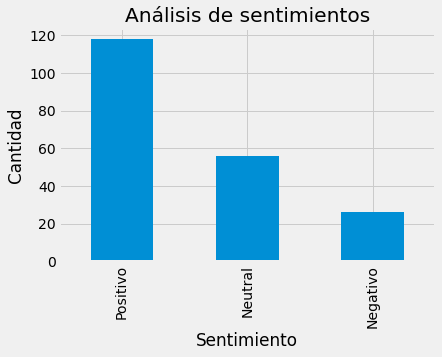

In [136]:
# Visualización de la cantidad por cada sentimineto
plt.title('Análisis de sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad')
df['Análisis'].value_counts().plot(kind = 'bar')
plt.show()